# Loss development patterns

In [7]:
import chainladder as cl
import pandas as pd

This example demonstrates the visualization of the loss development patterns as a percentage of ultimate claims to analyze emergence patterns. It shows how individual origins develop relative to their estimated ultimates, alongside the estimated development pattern across all origins. This helps identify unusual development behavior and validate reserving assumptions.

Specifically, each individual development curve shows the ratio of cumulative claims to `ultimates_` for each origin year, calculated using the `Chainladder` estimator. The average development pattern represents the expected emergence pattern, derived from the cumulative development factors `cdf_`.

In [8]:
# Load sample data
quarterly = cl.load_sample('quarterly')['incurred']

quarterly_dev = cl.Pipeline([
    ("dev", cl.Development()),
    ("tail", cl.TailCurve(projection_period=0)) # neglect tail projection
]).fit_transform(quarterly)

# Fit Chainladder estimator
quarterly_model = cl.Chainladder().fit(quarterly_dev)

# Calculate emergence triangle and expected emergence
emergence = (quarterly / quarterly_model.ultimate_).T
expected = (1 / quarterly_model.cdf_).T

# Unify results in a single DataFrame
expected.index = emergence.index
expected.columns = ['Expected']
result = pd.concat([emergence, expected], axis=1, keys=['Actual', 'Expected'])

/home/hendrik/Code/chainladder-python/chainladder/core/base.py:368: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datetime_mapping = dict(zip(datetime_arg, pd.to_datetime(**date_inference)))


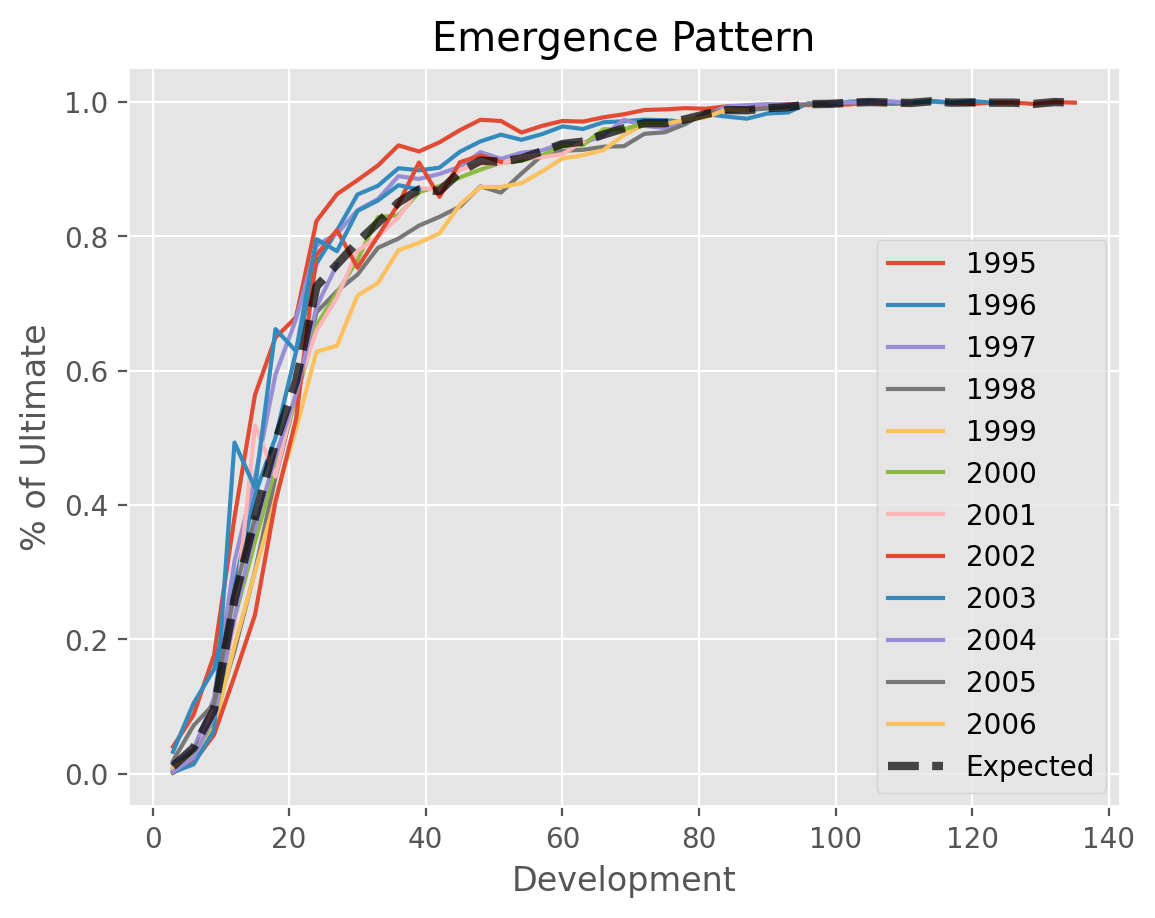

In [9]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
ax = result['Actual'].plot(
        title='Emergence Pattern',
    xlabel='Development', ylabel='% of Ultimate');
# Plot the average line with specific styling
ax = result['Expected'].plot(
    ax=ax,
    linewidth=3,           # Thicker line
    color='black',         # Different color
    linestyle='--',        # Dashed line
    alpha=0.7              # Slightly transparent
  )
